<a href="https://colab.research.google.com/github/MisGall10/Practica_26_Misael_Gallardo/blob/main/Practica26MAGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica # 26: Clases No balanceadas, Evaluaciones y SVM**

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 🔧 Instrucciones

1. **Carga y exploración del dataset**
   - Utiliza el dataset `breast_cancer` o `wine` de Scikit-Learn.
   - Verifica la distribución de clases.
   - Visualiza con un gráfico la distribución y las principales características.




Forma de X: (569, 30)
Forma de y: (569,)
Clases: ['malignant' 'benign']
Distribución de clases: [212 357]


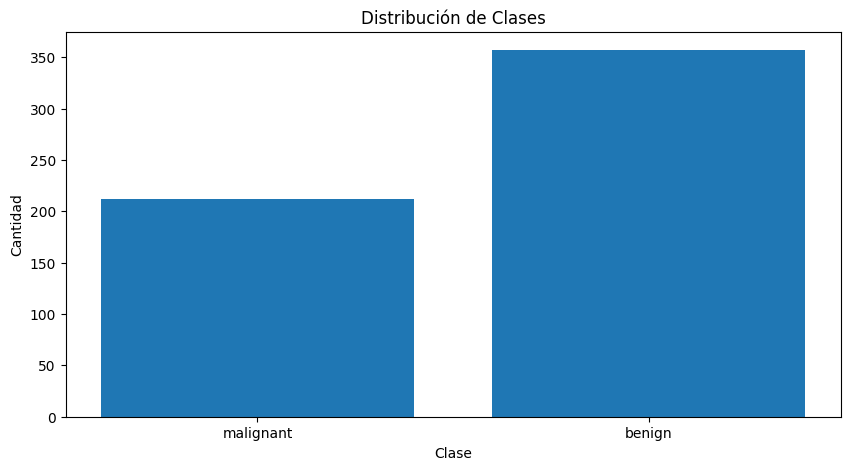

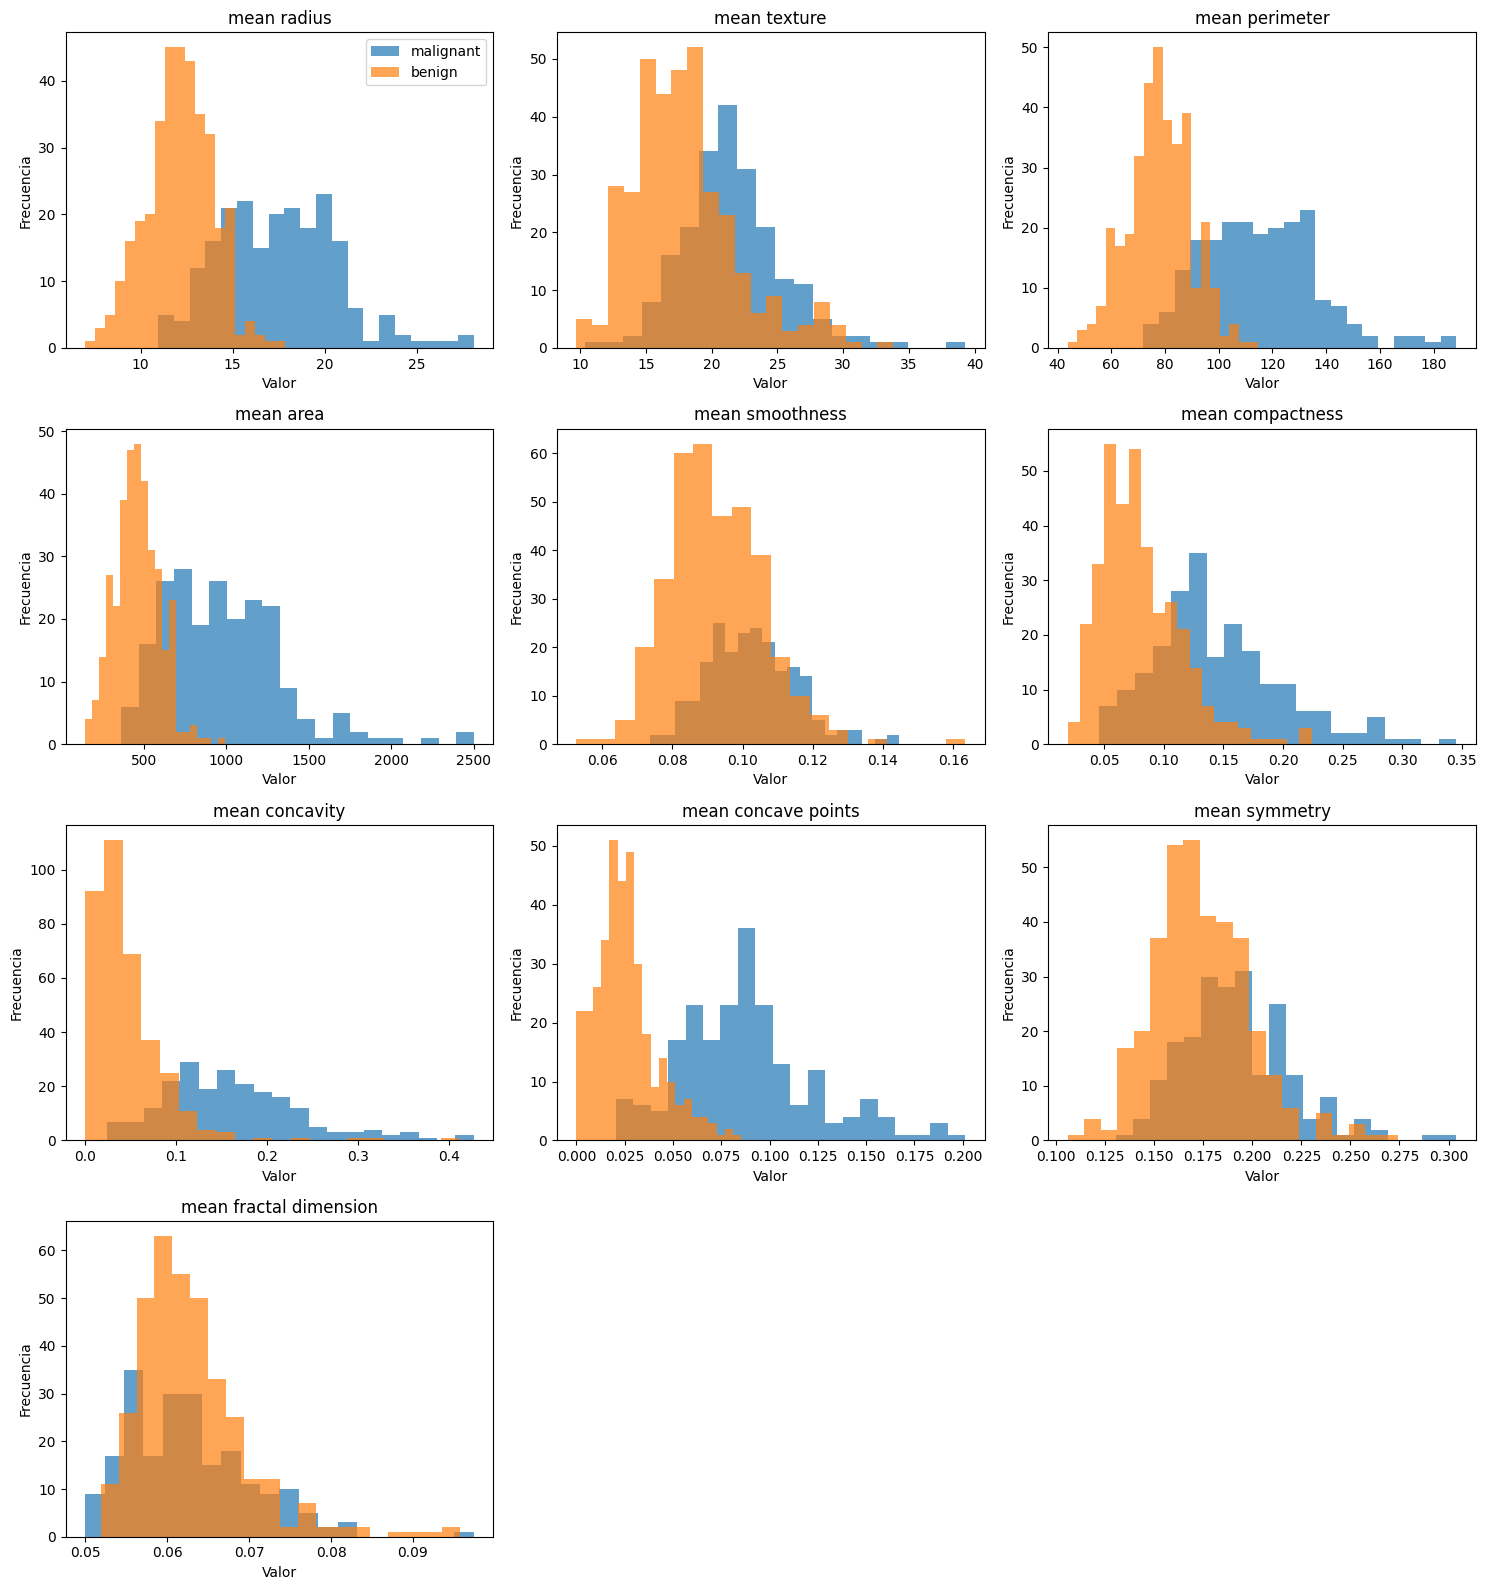

In [8]:
#Cargamos las bibliotecas a utilizar
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Cargamos el data set de breast_cancer
data = load_breast_cancer()
#Dividimos entre X (Caracteristicas) y y (targets)
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Verifica las formas
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Clases:", target_names)
print("Distribución de clases:", np.bincount(y))  # Cuenta la cantidad de cada clase

# Gráfico de barras para distribución de clases
plt.figure(figsize=(10, 5))
plt.bar([0, 1], np.bincount(y), tick_label=target_names)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

# Filtrar las características que contienen "mean"
mean_indices = [i for i, name in enumerate(feature_names) if "mean" in name]
# Cantidad de subplots necesarios
n_features = len(mean_indices)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

# Crear subplots
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for idx, feature_idx in enumerate(mean_indices):
    plt.subplot(n_rows, n_cols, idx + 1)

    plt.hist(X[y == 0, feature_idx], bins=20, alpha=0.7, label=target_names[0])
    plt.hist(X[y == 1, feature_idx], bins=20, alpha=0.7, label=target_names[1])
    plt.title(feature_names[feature_idx])
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

    if idx == 0:
        plt.legend()

plt.tight_layout()
plt.show()


---

2. **Entrenamiento base con SVM**
   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.



In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

#Crear el modelo SVM con kernel RBF
svm_model = clf = SVC(kernel='rbf', random_state=42)

# Crear StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Listas para métricas
precision_scores = []
recall_scores = []
f1_scores = []

# Entrenamiento y evaluación
print("=== Resultados por Fold ===\n")
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Entrenar modelo
    svm_model.fit(X_train, y_train)

    # Predecir targets
    y_pred = svm_model.predict(X_test)

    # Métricas por fold (macro promedio)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print(f"Fold {fold}")
    print(classification_report(y_test, y_pred, target_names=target_names))

# 6. Reporte final
print("\n=== Métricas promedio ===")
print(f"Precisión promedio: {np.mean(precision_scores):.4f}")
print(f"Recall promedio: {np.mean(recall_scores):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")


=== Resultados por Fold ===

Fold 1
              precision    recall  f1-score   support

   malignant       0.95      0.88      0.92        43
      benign       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Fold 2
              precision    recall  f1-score   support

   malignant       0.94      0.72      0.82        43
      benign       0.85      0.97      0.91        71

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114

Fold 3
              precision    recall  f1-score   support

   malignant       1.00      0.71      0.83        42
      benign       0.86      1.00      0.92        72

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91 

---

3. **Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?

Por lo que podemos notar en las metricas de cada Fold, la clase que tiene peor desempeño es la de `malignant`, ya que vemos como su recall cae hasta 0.71-0.79 lo cual nos indica que de todos los casos positivos cuantos detecto correctamente el modelo, o en otras palabras se evitan los falsos negativos.

   - Reporta matriz de confusión promedio.

Matriz de confusión promedio:
[[34.   8.4]
 [ 1.4 70. ]]


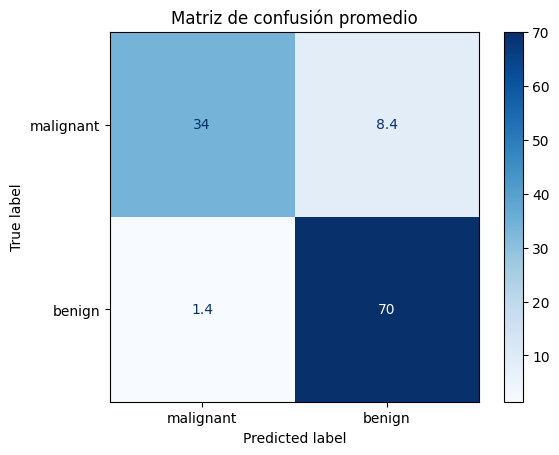

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

conf_matrix_sum = np.zeros((2, 2))  # 2 clases: malignant y benign

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    conf_matrix_sum += cm

# Promedio de matrices de confusión
conf_matrix_avg = conf_matrix_sum / skf.get_n_splits()

print("Matriz de confusión promedio:")
print(conf_matrix_avg)

# Graficar matriz promedio
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_avg, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión promedio")
plt.show()

---

4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.



In [22]:
from imblearn.over_sampling import SMOTE
# Listas para guardar los restultados de las metricas
metrics_no_smote = {'precision': [], 'recall': [], 'f1': []}
metrics_smote    = {'precision': [], 'recall': [], 'f1': []}
#Lista para guardar los valores de f1
f1_no_smote_by_class = []
f1_smote_by_class = []

# Loop por cada fold
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    #SIN SMOTE
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    metrics_no_smote['precision'].append(precision_score(y_test, y_pred, average='macro'))
    metrics_no_smote['recall'].append(   recall_score(y_test, y_pred, average='macro'))
    metrics_no_smote['f1'].append(       f1_score(y_test, y_pred, average='macro'))
    f1_fold_no_smote = f1_score(y_test, y_pred, average=None)  # devuelve array [class_0, class_1]
    f1_no_smote_by_class.append(f1_fold_no_smote)

    #CON SMOTE
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)   # solo entreno re-muestreado
    clf.fit(X_res, y_res)
    y_pred_sm = clf.predict(X_test)
    metrics_smote['precision'].append(precision_score(y_test, y_pred_sm, average='macro'))
    metrics_smote['recall'].append(   recall_score(y_test, y_pred_sm, average='macro'))
    metrics_smote['f1'].append(       f1_score(y_test, y_pred_sm, average='macro'))
    f1_fold_smote = f1_score(y_test, y_pred_sm, average=None)
    f1_smote_by_class.append(f1_fold_smote)

# Calcular promedios
def summarize_metrics(d):
    return {m: np.mean(vals) for m, vals in d.items()}

summary_no_smote = summarize_metrics(metrics_no_smote)
summary_smote    = summarize_metrics(metrics_smote)

# Reportar comparación
print("=== Métricas promedio SIN SMOTE ===")
print(f"Precision: {summary_no_smote['precision']:.4f}")
print(f"Recall:    {summary_no_smote['recall']:.4f}")
print(f"F1-score:  {summary_no_smote['f1']:.4f}\n")

print("=== Métricas promedio CON SMOTE ===")
print(f"Precision: {summary_smote['precision']:.4f}")
print(f"Recall:    {summary_smote['recall']:.4f}")
print(f"F1-score:  {summary_smote['f1']:.4f}")

=== Métricas promedio SIN SMOTE ===
Precision: 0.9290
Recall:    0.8911
F1-score:  0.9035

=== Métricas promedio CON SMOTE ===
Precision: 0.9041
Recall:    0.8934
F1-score:  0.8957


---

5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.

Como principal ventaja es que para clases que estan muy desbalanceadas SMOTE ayuda a generar datos sinteticos en base a la informacion de los datos para poder ayudar con el analisis ya que al tenener bien balanaceadas las clases el modelo puede aprender de manera equitativa como predecir la clase, el principal riesgo es que al ser datos sinteticos, podria alterar de manera muy compleja el modelo basado en SVM ya que tendria mas clases solapadas y lo haria un poco mas pesado por el costo computacional

   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.

OSS es conveninete de usar cuando la clase mayoritaria tiene muchos datos irrelevantes o ruidoso, lo cual pareceria no ser el caso ya que las clases se ven bastante balanceadas.

A diferencia de `OSS`, `ADASYN` Genera datos donde la clase minoritaria es mas dificil de aprender por el desvalance, estas generan datos de forma que se adaptan de maneran o uniforme

F1 por clase SIN SMOTE: [0.87208962 0.93496346]
F1 por clase CON SMOTE: [0.86788519 0.92352473]


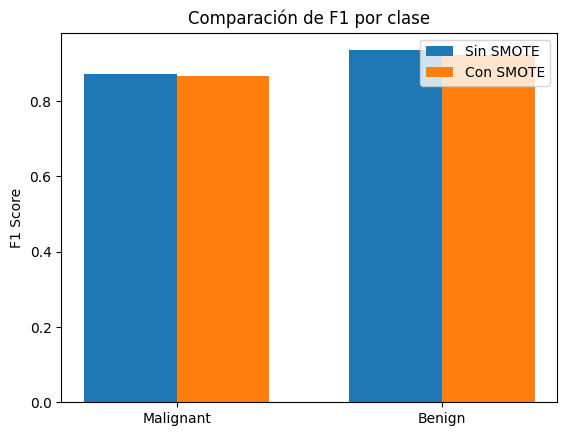

In [24]:
# Hacemos un array para poder sacar los promedios.
f1_no_smote_by_class = np.array(f1_no_smote_by_class)
f1_smote_by_class = np.array(f1_smote_by_class)

# Calculamos F1 promedio por clase
f1_no_smote_avg = f1_no_smote_by_class.mean(axis=0)
f1_smote_avg = f1_smote_by_class.mean(axis=0)
# Imprimimos los valores que tenemos para malignant y benign
print("F1 por clase SIN SMOTE:", f1_no_smote_avg)
print("F1 por clase CON SMOTE:", f1_smote_avg)
# Mostramos el grafico para el caso con SMOTE y sin SMOTE
labels = ['Malignant', 'Benign']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, f1_no_smote_avg, width, label='Sin SMOTE')
bars2 = ax.bar(x + width/2, f1_smote_avg, width, label='Con SMOTE')

ax.set_ylabel('F1 Score')
ax.set_title('Comparación de F1 por clase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF
